This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?urlpath=lab/tree/notebooks/6_clustering/)

# Kernel Kmeans Example, on a 2 classes problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.stats as stats
%matplotlib inline

## Create data set : 

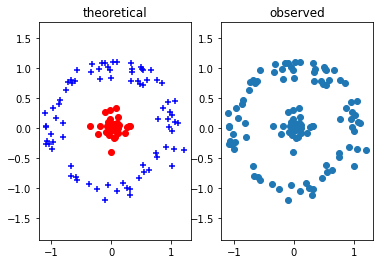

In [2]:
D1=np.random.randn(80,)*.1 +1
P1=np.random.rand(80,)*2*np.pi
D2=np.random.randn(40,)*.2
P2=np.random.rand(40,)*2*np.pi

C1=np.zeros((80,2))
C1[:,0]=D1*np.cos(P1)
C1[:,1]=D1*np.sin(P1)

C2=np.zeros((40,2))
C2[:,0]=D2*np.cos(P2)
C2[:,1]=D2*np.sin(P2)

plt.subplot(121)
fig=plt.scatter(C1[:,0],C1[:,1],marker='+', color='blue')
fig=plt.scatter(C2[:,0],C2[:,1],marker='o', color='red')
plt.axis('equal')
plt.title('theoretical')
X=np.append(C1,C2,axis=0)
plt.subplot(122)
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')
plt.title('observed');


### Question 
   - Briefly explain why usual Kmeans algorithm will fail to detect the classes above
   - Is the Kernel approach the only possibily for this kind of clustering problem? 

### Exercice

- Propose a change of representation space to allow successfull Kmeans clustering in a 1D space. Implement it (use Kmeans_basic.ipynb example)
- Explain the role, then change the parameter values of 'gamma' and 'pos' in Kernel Kmeans code below.
- Comment your findings

converged in 2 iterations


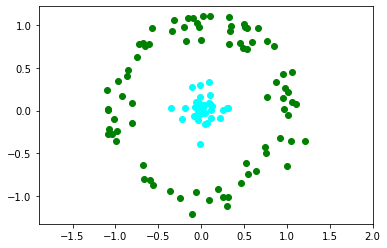

In [3]:
#Kernel computation 
N=X.shape[0]
Ker=np.zeros((N,N))


gamma=1
for i in range(0,N):
    for j in range(0,N):
        d=np.sum((X[i,:]-X[j,:])**2)
        Ker[i,j]=np.exp(-gamma*d)
        
        
# Init
import numpy.matlib

converged = 0;
# Assign all objects into one cluster except one
# Kernel K-means is *very* sensitive to initial conditions (as is Kmeans).  Try altering
# this initialisation to see the effect.
# Use e.g. (Gamma=10, pos<80,  or Gamma=1, pos>80  on this example : explain)
K = 2;
Z = np.matlib.repmat(np.array([1,0]),N,1);    
s=np.sum(X**2,axis=1)
pos= np.where(s==s.min())[0]
#pos=99
Z[pos,:]=[0,1]
di=np.zeros((N,K))
count=0

while converged == 0:
    count+=1
    Nk=np.sum(Z,axis=0)
    converged=1
    for k in range(0,K):
        Vk=Z[:,k].reshape(N,1)
        di[:,k]=np.diag(Ker)\
        -(2/Nk[k])*np.sum(np.matlib.repmat(Vk.transpose(),N,1)*Ker,axis=1)\
        +(float(Nk[k])**(-2))*np.sum( np.sum( \
        (Vk@Vk.transpose())*Ker,axis=0), axis=0  )
    
    oldZ=np.copy(Z)
    Z=np.zeros((N,K))
    
    for i in range (0,N):
        if di[i,0]<di[i,1]:
            Z[i,:]=[1,0]
            if Z[i,0]!=oldZ[i,0] :
                converged=0
        else:
            Z[i,:]=[0,1]
            if Z[i,1]!=oldZ[i,1] :
                converged=0

#visu
IndC0=np.where(Z[:,0]==1)[0]
IndC1=np.where(Z[:,1]==1)[0]          
  
plt.scatter(X[IndC0,0],X[IndC0,1],color='green',marker='o')
plt.scatter(X[IndC1,0],X[IndC1,1],color='cyan',marker='o')
plt.axis('equal');

print('converged in {} iterations'.format(count))